In [847]:
%matplotlib inline
from IPython import display
from mxnet import nd, autograd
from time import time
import random
from matplotlib import pyplot as plt

a = nd.ones(shape=1000)
b = nd.ones(shape=1000)
c = nd.zeros(shape=1000)

In [848]:
start = time()
for i in range(a.shape[0]):
        c[i] = a[i] + b[i]
print(time() - start)

start = time()
c = a + b
print(time() - start)


0.0626215934753418
8.392333984375e-05


In [849]:
a = nd.ones(shape=(3,1))
b = 10
print(a + b)



[[11.]
 [11.]
 [11.]]
<NDArray 3x1 @cpu(0)>


In [850]:
num_examples = 1000
# test 
# print(nd.dot(labels.reshape(-1,1), params.reshape(1, -1))) #use reshape to convert ndarray into matrix (vector)

In [851]:
# generate the synthetic dataset
params= nd.array([2.3, -12]).reshape(-1, 1)
Xmat = nd.concat(nd.random.normal(loc=1, scale=5, shape=(1, 1000)),(nd.random.uniform(1, 1, shape=(1, 1000))), dim=0)
Xmat = Xmat.T

In [852]:
# generate the synthetic responses based on the params, and a noise vector
responses = nd.dot(Xmat, params) 
noise = nd.random.normal(loc=0, scale=1, shape=(1000, 1))
responses = responses + noise

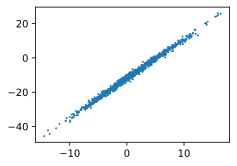

In [853]:
# visualize the dataset
display.set_matplotlib_formats('svg')
plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.scatter(Xmat[:, 0].asnumpy(), responses.asnumpy(), 1)

In [854]:
# read from dataset
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i:min(num_examples, i + batch_size)])
        yield features.take(j), labels.take(j)

batch_size = 10
for X,y in data_iter(batch_size, Xmat, responses):
    print(X, y)
    break


[[-3.5836105   1.        ]
 [-5.893862    1.        ]
 [ 6.6163783   1.        ]
 [-3.3798838   1.        ]
 [ 0.3468485   1.        ]
 [ 8.010853    1.        ]
 [-0.24391675  1.        ]
 [-6.52428     1.        ]
 [ 1.849509    1.        ]
 [ 4.5682535   1.        ]]
<NDArray 10x2 @cpu(0)> 
[[-19.895603 ]
 [-24.461643 ]
 [  2.9789305]
 [-18.429213 ]
 [-12.7787895]
 [  5.1518373]
 [-13.287793 ]
 [-25.54675  ]
 [ -9.198434 ]
 [ -1.5262533]]
<NDArray 10x1 @cpu(0)>


In [855]:
# regression funcitons

def predictor(Xmat, cof):
    return nd.dot(Xmat, cof)

def squared_loss(yhat, y):
    return (yhat - y) ** 2 / 2

# optimizer
def sgd(cofs, lr, batch_size):
    #print(cofs, lr * cofs.grad / batch_size, cofs - lr * cofs.grad / batch_size)
    cofs[:] = cofs - lr * cofs.grad / batch_size
    
# dif = (nd.array([3, 2, 1]) - nd.array([1, 1, 1]))
# print(dif, dif ** 2 / 2)


In [ ]:
# regression model
lr = 0.003
num_epochs = 10000
net = predictor
loss = squared_loss

betas = nd.array([-19, 90]).reshape(-1, 1)
betas.attach_grad()

for epoch in range(num_epochs):
    for X, y in data_iter(10, X, responses):
        with autograd.record():
            l = loss(net(X, betas), y)
        l.backward() # calculate gradient
        sgd(betas, lr, batch_size)
    train_l = loss(net(X, betas), y)
    print(f'epoch: {epoch} training loss: {train_l.mean().asnumpy()}')
    
print(betas, params)


epoch: 0 training loss: [8639.359]
epoch: 1 training loss: [7813.4814]
epoch: 2 training loss: [7222.0596]
epoch: 3 training loss: [7049.579]
epoch: 4 training loss: [6985.9507]
epoch: 5 training loss: [6574.4556]
epoch: 6 training loss: [6472.318]
epoch: 7 training loss: [6049.626]
epoch: 8 training loss: [5953.934]
epoch: 9 training loss: [5759.4224]
epoch: 10 training loss: [5580.752]
epoch: 11 training loss: [5684.439]
epoch: 12 training loss: [5305.46]
epoch: 13 training loss: [5313.8394]
epoch: 14 training loss: [5285.3506]
epoch: 15 training loss: [5046.05]
epoch: 16 training loss: [5032.076]
epoch: 17 training loss: [4888.0796]
epoch: 18 training loss: [4820.9556]
epoch: 19 training loss: [4804.439]
epoch: 20 training loss: [4693.7593]
epoch: 21 training loss: [4699.464]
epoch: 22 training loss: [4541.496]
epoch: 23 training loss: [4608.4365]
epoch: 24 training loss: [4607.7036]
epoch: 25 training loss: [4502.306]
epoch: 26 training loss: [4454.4033]
epoch: 27 training loss: [4

epoch: 276 training loss: [1019.3206]
epoch: 277 training loss: [1001.5648]
epoch: 278 training loss: [1001.02216]
epoch: 279 training loss: [998.5084]
epoch: 280 training loss: [986.4414]
epoch: 281 training loss: [984.4824]
epoch: 282 training loss: [981.444]
epoch: 283 training loss: [971.08496]
epoch: 284 training loss: [969.7363]
epoch: 285 training loss: [957.975]
epoch: 286 training loss: [957.9377]
epoch: 287 training loss: [943.3335]
epoch: 288 training loss: [935.792]
epoch: 289 training loss: [941.3919]
epoch: 290 training loss: [934.388]
epoch: 291 training loss: [932.0709]
epoch: 292 training loss: [924.8589]
epoch: 293 training loss: [907.3532]
epoch: 294 training loss: [907.3924]
epoch: 295 training loss: [905.1632]
epoch: 296 training loss: [897.53503]
epoch: 297 training loss: [888.347]
epoch: 298 training loss: [899.04425]
epoch: 299 training loss: [882.7381]
epoch: 300 training loss: [872.95624]
epoch: 301 training loss: [871.8797]
epoch: 302 training loss: [875.6232

epoch: 592 training loss: [185.04099]
epoch: 593 training loss: [182.9841]
epoch: 594 training loss: [182.69951]
epoch: 595 training loss: [178.18323]
epoch: 596 training loss: [182.14195]
epoch: 597 training loss: [179.6962]
epoch: 598 training loss: [178.04825]
epoch: 599 training loss: [174.30637]
epoch: 600 training loss: [179.35603]
epoch: 601 training loss: [177.34286]
epoch: 602 training loss: [175.2548]
epoch: 603 training loss: [171.40845]
epoch: 604 training loss: [176.59042]
epoch: 605 training loss: [174.17009]
epoch: 606 training loss: [172.77798]
epoch: 607 training loss: [171.02258]
epoch: 608 training loss: [170.11899]
epoch: 609 training loss: [168.29312]
epoch: 610 training loss: [170.4559]
epoch: 611 training loss: [167.04903]
epoch: 612 training loss: [168.83743]
epoch: 613 training loss: [167.08884]
epoch: 614 training loss: [165.41884]
epoch: 615 training loss: [165.78891]
epoch: 616 training loss: [164.28748]
epoch: 617 training loss: [163.9271]
epoch: 618 traini

epoch: 911 training loss: [61.10038]
epoch: 912 training loss: [60.672432]
epoch: 913 training loss: [59.39629]
epoch: 914 training loss: [59.423695]
epoch: 915 training loss: [57.528282]
epoch: 916 training loss: [58.886383]
epoch: 917 training loss: [58.469704]
epoch: 918 training loss: [58.844612]
epoch: 919 training loss: [59.48119]
epoch: 920 training loss: [58.797302]
epoch: 921 training loss: [58.414307]
epoch: 922 training loss: [58.133034]
epoch: 923 training loss: [58.214497]
epoch: 924 training loss: [58.02476]
epoch: 925 training loss: [57.88338]
epoch: 926 training loss: [56.65397]
epoch: 927 training loss: [57.806896]
epoch: 928 training loss: [57.378315]
epoch: 929 training loss: [57.80636]
epoch: 930 training loss: [57.40271]
epoch: 931 training loss: [56.16918]
epoch: 932 training loss: [57.37386]
epoch: 933 training loss: [57.0417]
epoch: 934 training loss: [56.64103]
epoch: 935 training loss: [55.700634]
epoch: 936 training loss: [56.664997]
epoch: 937 training loss:

epoch: 1230 training loss: [39.606903]
epoch: 1231 training loss: [42.82637]
epoch: 1232 training loss: [41.620464]
epoch: 1233 training loss: [41.38513]
epoch: 1234 training loss: [41.17528]
epoch: 1235 training loss: [40.547455]
epoch: 1236 training loss: [41.363335]
epoch: 1237 training loss: [40.834686]
epoch: 1238 training loss: [41.212162]
epoch: 1239 training loss: [40.725548]
epoch: 1240 training loss: [41.162216]
epoch: 1241 training loss: [40.52913]
epoch: 1242 training loss: [41.22431]
epoch: 1243 training loss: [40.914234]
epoch: 1244 training loss: [41.150284]
epoch: 1245 training loss: [41.031487]
epoch: 1246 training loss: [40.08472]
epoch: 1247 training loss: [41.099243]
epoch: 1248 training loss: [40.81261]
epoch: 1249 training loss: [40.525654]
epoch: 1250 training loss: [40.820946]
epoch: 1251 training loss: [40.752327]
epoch: 1252 training loss: [40.311703]
epoch: 1253 training loss: [40.894524]
epoch: 1254 training loss: [40.885757]
epoch: 1255 training loss: [40.6

epoch: 1549 training loss: [38.52233]
epoch: 1550 training loss: [38.969036]
epoch: 1551 training loss: [38.7349]
epoch: 1552 training loss: [38.53626]
epoch: 1553 training loss: [38.541496]
epoch: 1554 training loss: [38.497604]
epoch: 1555 training loss: [38.61666]
epoch: 1556 training loss: [38.415657]
epoch: 1557 training loss: [38.58288]
epoch: 1558 training loss: [37.26669]
epoch: 1559 training loss: [38.728428]
epoch: 1560 training loss: [38.595497]
epoch: 1561 training loss: [38.26367]
epoch: 1562 training loss: [38.16157]
epoch: 1563 training loss: [38.525696]
epoch: 1564 training loss: [37.76474]
epoch: 1565 training loss: [38.230698]
epoch: 1566 training loss: [36.813484]
epoch: 1567 training loss: [38.831947]
epoch: 1568 training loss: [38.68296]
epoch: 1569 training loss: [38.57656]
epoch: 1570 training loss: [38.435402]
epoch: 1571 training loss: [37.56338]
epoch: 1572 training loss: [38.15908]
epoch: 1573 training loss: [36.660095]
epoch: 1574 training loss: [35.96725]
e

epoch: 1865 training loss: [35.864025]
epoch: 1866 training loss: [39.144985]
epoch: 1867 training loss: [38.475548]
epoch: 1868 training loss: [37.24524]
epoch: 1869 training loss: [37.316544]
epoch: 1870 training loss: [37.719734]
epoch: 1871 training loss: [38.653206]
epoch: 1872 training loss: [38.342567]
epoch: 1873 training loss: [37.88664]
epoch: 1874 training loss: [38.48723]
epoch: 1875 training loss: [37.636734]
epoch: 1876 training loss: [37.73248]
epoch: 1877 training loss: [36.084087]
epoch: 1878 training loss: [38.88064]
epoch: 1879 training loss: [37.928406]
epoch: 1880 training loss: [37.759483]
epoch: 1881 training loss: [36.479027]
epoch: 1882 training loss: [38.96893]
epoch: 1883 training loss: [38.27602]
epoch: 1884 training loss: [38.38316]
epoch: 1885 training loss: [38.460762]
epoch: 1886 training loss: [38.117012]
epoch: 1887 training loss: [38.18746]
epoch: 1888 training loss: [37.18093]
epoch: 1889 training loss: [38.246536]
epoch: 1890 training loss: [38.1159

epoch: 2183 training loss: [38.11487]
epoch: 2184 training loss: [37.34389]
epoch: 2185 training loss: [38.217484]
epoch: 2186 training loss: [36.703682]
epoch: 2187 training loss: [36.876656]
epoch: 2188 training loss: [38.903908]
epoch: 2189 training loss: [35.690956]
epoch: 2190 training loss: [39.061897]
epoch: 2191 training loss: [37.52766]
epoch: 2192 training loss: [38.500156]
epoch: 2193 training loss: [38.15628]
epoch: 2194 training loss: [38.14522]
epoch: 2195 training loss: [37.933853]
epoch: 2196 training loss: [37.533024]
epoch: 2197 training loss: [38.370255]
epoch: 2198 training loss: [37.88065]
epoch: 2199 training loss: [37.603615]
epoch: 2200 training loss: [38.20213]
epoch: 2201 training loss: [38.04496]
epoch: 2202 training loss: [35.879356]
epoch: 2203 training loss: [38.476772]
epoch: 2204 training loss: [38.541748]
epoch: 2205 training loss: [37.890244]
epoch: 2206 training loss: [38.155098]
epoch: 2207 training loss: [38.037872]
epoch: 2208 training loss: [38.15

epoch: 2503 training loss: [38.3302]
epoch: 2504 training loss: [37.156796]
epoch: 2505 training loss: [38.224033]
epoch: 2506 training loss: [37.533443]
epoch: 2507 training loss: [38.00927]
epoch: 2508 training loss: [35.352577]
epoch: 2509 training loss: [39.250916]
epoch: 2510 training loss: [37.210777]
epoch: 2511 training loss: [37.596214]
epoch: 2512 training loss: [36.999947]
epoch: 2513 training loss: [39.079163]
epoch: 2514 training loss: [38.04548]
epoch: 2515 training loss: [36.2185]
epoch: 2516 training loss: [35.366367]
epoch: 2517 training loss: [38.03479]
epoch: 2518 training loss: [37.715008]
epoch: 2519 training loss: [38.207855]
epoch: 2520 training loss: [40.112415]
epoch: 2521 training loss: [38.544388]
epoch: 2522 training loss: [38.05139]
epoch: 2523 training loss: [38.1827]
epoch: 2524 training loss: [38.0655]
epoch: 2525 training loss: [37.402332]
epoch: 2526 training loss: [37.77035]
epoch: 2527 training loss: [38.33376]
epoch: 2528 training loss: [37.49538]
e

epoch: 2820 training loss: [38.15348]
epoch: 2821 training loss: [38.061707]
epoch: 2822 training loss: [37.99841]
epoch: 2823 training loss: [38.140488]
epoch: 2824 training loss: [38.09008]
epoch: 2825 training loss: [36.88874]
epoch: 2826 training loss: [37.931435]
epoch: 2827 training loss: [38.399784]
epoch: 2828 training loss: [37.805355]
epoch: 2829 training loss: [38.222958]
epoch: 2830 training loss: [37.24904]
epoch: 2831 training loss: [33.931892]
epoch: 2832 training loss: [39.203693]
epoch: 2833 training loss: [36.02431]
epoch: 2834 training loss: [38.950867]
epoch: 2835 training loss: [37.652855]
epoch: 2836 training loss: [39.29301]
epoch: 2837 training loss: [37.201073]
epoch: 2838 training loss: [38.264057]
epoch: 2839 training loss: [38.155327]
epoch: 2840 training loss: [36.4307]
epoch: 2841 training loss: [36.273003]
epoch: 2842 training loss: [38.920654]
epoch: 2843 training loss: [38.056873]
epoch: 2844 training loss: [39.40195]
epoch: 2845 training loss: [38.5929

epoch: 3136 training loss: [35.93215]
epoch: 3137 training loss: [35.836586]
epoch: 3138 training loss: [39.143444]
epoch: 3139 training loss: [38.309036]
epoch: 3140 training loss: [38.56628]
epoch: 3141 training loss: [38.12653]
epoch: 3142 training loss: [37.658592]
epoch: 3143 training loss: [38.244007]
epoch: 3144 training loss: [38.0042]
epoch: 3145 training loss: [37.776573]
epoch: 3146 training loss: [37.77855]
epoch: 3147 training loss: [38.535297]
epoch: 3148 training loss: [36.70015]
epoch: 3149 training loss: [36.235474]
epoch: 3150 training loss: [36.323]
epoch: 3151 training loss: [39.479942]
epoch: 3152 training loss: [39.016403]
epoch: 3153 training loss: [38.82273]
epoch: 3154 training loss: [37.921333]
epoch: 3155 training loss: [38.535683]
epoch: 3156 training loss: [37.907063]
epoch: 3157 training loss: [37.723]
epoch: 3158 training loss: [37.66729]
epoch: 3159 training loss: [36.47717]
epoch: 3160 training loss: [37.570625]
epoch: 3161 training loss: [38.095005]
ep

epoch: 3454 training loss: [38.13014]
epoch: 3455 training loss: [38.071625]
epoch: 3456 training loss: [38.019276]
epoch: 3457 training loss: [38.11065]
epoch: 3458 training loss: [38.035767]
epoch: 3459 training loss: [38.148594]
epoch: 3460 training loss: [37.10261]
epoch: 3461 training loss: [38.232826]
epoch: 3462 training loss: [35.953583]
epoch: 3463 training loss: [36.216736]
epoch: 3464 training loss: [39.108707]
epoch: 3465 training loss: [35.311665]
epoch: 3466 training loss: [37.240303]
epoch: 3467 training loss: [38.793293]
epoch: 3468 training loss: [35.856197]
epoch: 3469 training loss: [40.216763]
epoch: 3470 training loss: [39.267548]
epoch: 3471 training loss: [38.445183]
epoch: 3472 training loss: [38.0497]
epoch: 3473 training loss: [37.20954]
epoch: 3474 training loss: [38.12472]
epoch: 3475 training loss: [36.92005]
epoch: 3476 training loss: [38.41422]
epoch: 3477 training loss: [38.18945]
epoch: 3478 training loss: [37.978767]
epoch: 3479 training loss: [37.5554

epoch: 3771 training loss: [38.115673]
epoch: 3772 training loss: [38.423775]
epoch: 3773 training loss: [38.479668]
epoch: 3774 training loss: [36.97471]
epoch: 3775 training loss: [36.654255]
epoch: 3776 training loss: [38.80631]
epoch: 3777 training loss: [37.671978]
epoch: 3778 training loss: [37.92882]
epoch: 3779 training loss: [36.87971]
epoch: 3780 training loss: [36.374355]
epoch: 3781 training loss: [36.244385]
epoch: 3782 training loss: [39.809628]
epoch: 3783 training loss: [38.432133]
epoch: 3784 training loss: [36.68822]
epoch: 3785 training loss: [38.59143]
epoch: 3786 training loss: [38.426537]
epoch: 3787 training loss: [38.178352]
epoch: 3788 training loss: [35.963947]
epoch: 3789 training loss: [38.48407]
epoch: 3790 training loss: [38.250046]
epoch: 3791 training loss: [38.36271]
epoch: 3792 training loss: [38.067028]
epoch: 3793 training loss: [37.978477]
epoch: 3794 training loss: [38.0458]
epoch: 3795 training loss: [38.00544]
epoch: 3796 training loss: [35.16164

epoch: 4092 training loss: [32.660305]
epoch: 4093 training loss: [40.39688]
epoch: 4094 training loss: [38.974754]
epoch: 4095 training loss: [38.49392]
epoch: 4096 training loss: [38.82321]
epoch: 4097 training loss: [38.60836]
epoch: 4098 training loss: [36.984116]
epoch: 4099 training loss: [35.080914]
epoch: 4100 training loss: [35.344448]
epoch: 4101 training loss: [37.618137]
epoch: 4102 training loss: [31.958332]
epoch: 4103 training loss: [35.70462]
epoch: 4104 training loss: [41.542908]
epoch: 4105 training loss: [40.237427]
epoch: 4106 training loss: [39.15085]
epoch: 4107 training loss: [39.49791]
epoch: 4108 training loss: [37.248672]
epoch: 4109 training loss: [38.95955]
epoch: 4110 training loss: [38.348827]
epoch: 4111 training loss: [36.343956]
epoch: 4112 training loss: [34.83806]
epoch: 4113 training loss: [37.236965]
epoch: 4114 training loss: [38.463253]
epoch: 4115 training loss: [39.239143]
epoch: 4116 training loss: [38.701862]
epoch: 4117 training loss: [38.307

epoch: 4409 training loss: [38.66029]
epoch: 4410 training loss: [39.396248]
epoch: 4411 training loss: [38.29071]
epoch: 4412 training loss: [38.08517]
epoch: 4413 training loss: [38.149418]
epoch: 4414 training loss: [38.12759]
epoch: 4415 training loss: [38.121098]
epoch: 4416 training loss: [37.89985]
epoch: 4417 training loss: [37.395412]
epoch: 4418 training loss: [37.502007]
epoch: 4419 training loss: [36.578823]
epoch: 4420 training loss: [38.121437]
epoch: 4421 training loss: [38.2472]
epoch: 4422 training loss: [38.276077]
epoch: 4423 training loss: [37.699707]
epoch: 4424 training loss: [38.12684]
epoch: 4425 training loss: [37.655006]
epoch: 4426 training loss: [38.18163]
epoch: 4427 training loss: [36.92801]
epoch: 4428 training loss: [36.377]
epoch: 4429 training loss: [38.871574]
epoch: 4430 training loss: [34.519894]
epoch: 4431 training loss: [39.452362]
epoch: 4432 training loss: [38.3894]
epoch: 4433 training loss: [37.79282]
epoch: 4434 training loss: [36.32502]
epo

epoch: 4724 training loss: [37.163147]
epoch: 4725 training loss: [36.464264]
epoch: 4726 training loss: [35.64783]
epoch: 4727 training loss: [39.244774]
epoch: 4728 training loss: [38.442978]
epoch: 4729 training loss: [36.53414]
epoch: 4730 training loss: [39.880836]
epoch: 4731 training loss: [33.45263]
epoch: 4732 training loss: [37.818336]
epoch: 4733 training loss: [37.23811]
epoch: 4734 training loss: [40.625725]
epoch: 4735 training loss: [38.073544]
epoch: 4736 training loss: [36.15844]
epoch: 4737 training loss: [34.94264]
epoch: 4738 training loss: [37.077843]
epoch: 4739 training loss: [39.871605]
epoch: 4740 training loss: [39.460217]
epoch: 4741 training loss: [38.190704]
epoch: 4742 training loss: [39.16022]
epoch: 4743 training loss: [37.989246]
epoch: 4744 training loss: [38.359253]
epoch: 4745 training loss: [38.13399]
epoch: 4746 training loss: [37.365555]
epoch: 4747 training loss: [38.230747]
epoch: 4748 training loss: [38.06282]
epoch: 4749 training loss: [36.631